<a href="https://colab.research.google.com/github/statisthong/kaggle-titanic/blob/main/8%EC%9B%9422%EC%9D%BC(4%EC%9D%BC%EC%B0%A8_%EC%88%98%EC%97%85%EC%9A%A9)_Decision_tree_in_Python_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=SLthX31dbtI

1. Import packages

In [284]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

2. Read data

In [391]:
#train = pd.read_csv('/content/drive/MyDrive/train.csv') # 모델 학습 파일
#test = pd.read_csv('/content/drive/MyDrive/test.csv')  # 모델 테스트 파일
#submission = pd.read_csv('/content/drive/MyDrive/submission.csv') # Kaggle에 제출할 샘플 파일

train_url = 'https://raw.githubusercontent.com/statisthong/kaggle-titanic/main/train.csv'
test_url = 'https://raw.githubusercontent.com/statisthong/kaggle-titanic/main/test.csv'
submission_url = 'https://raw.githubusercontent.com/statisthong/kaggle-titanic/main/submission.csv'
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)
submission = pd.read_csv(submission_url)

3. Inspect data

In [393]:
print(train.columns.values)
print(test.columns.values)
print(submission.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
['PassengerId' 'Survived']


In [394]:
print(train.shape)
print(test.shape)
print(submission.shape)

(891, 12)
(418, 11)
(418, 2)


In [164]:
# check missing values
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


test data 의 결측치를 확인해보세요.

In [285]:
train.drop('Cabin', axis = 1,inplace=True) #drop Cabin column
test.drop('Cabin', axis = 1,inplace=True) #drop Cabin column

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [18]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [19]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

Exploratory Data Analysis ==> 자료유형, 범위, 수준, 의미 파악 ==> 가설, 검증

* 질적 변수 (Qualiltative data) : 특성에 따라 범주로 구분, 명목형, 순서형 

* 범주형 변수들의 도수, 상대도수, 도수분포를 작성해 보세요. value_counts(), value_counts(normalize=True), sns.countplot() 이용

예) Survived

In [20]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

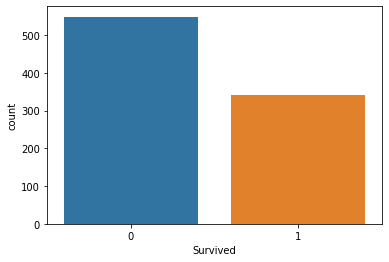

In [23]:
sns.countplot(x = 'Survived', data = train)

Pclass 의 도수, 상대도수, 도수분포를 작성해 보세요. value_counts(), value_counts(normalize=True), sns.countplot() 이용

Sex 의 도수, 상대도수, 도수분포를 작성해 보세요. value_counts(), value_counts(normalize=True), sns.countplot() 이용

Ticket 의 도수, 상대도수, 도수분포를 작성해 보세요. value_counts(), value_counts(normalize=True), sns.countplot() 이용

Embarked 의 도수, 상대도수, 도수분포를 작성해 보세요. value_counts(), value_counts(normalize=True), sns.countplot() 이용

* 범주형 변수와 범주형 변수 관계 
* 범주형 변수 Survived 와 나머지 범주형 변수들의 관계를 sns.countplot(x='Survived', data = data, hue='')를 이용하여 나타내보세요.

Survived, Sex 의 관계

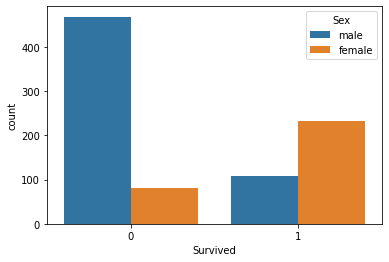

In [24]:
sns.countplot(x='Survived', data = train, hue='Sex')

Survived, Pclass 의 관계

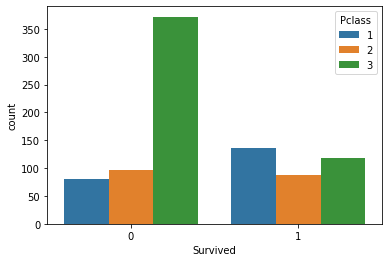

In [25]:
sns.countplot(x='Survived', data = train, hue='Pclass')

Q) 좌석등급과 생존의 관계는 ? : 

Survived, Embarked 의 관계

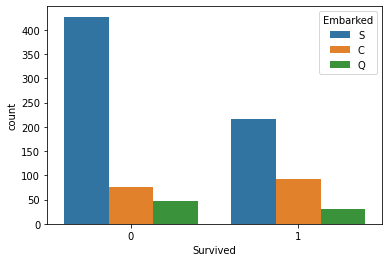

In [26]:
sns.countplot(x='Survived', data = train, hue="Embarked")

Q) 탑승지와 생존의 관계는? :

Survived, Sibsp 의 관계

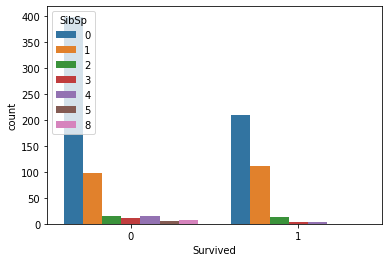

In [27]:
sns.countplot(x='Survived', data = train, hue="SibSp")

Q) 형제 자매 배우자의 수와 생존의 관계는 ? :


Survived, Parch 의 관계

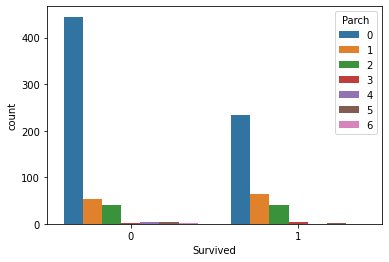

In [28]:
sns.countplot(x='Survived', data = train, hue="Parch")

Q) 부모 자식의 수와 생존의 관계는 ? :

* 양적 변수 (Quantatitive data) : 양적 수치로 측정가능 개수로 측정가능, 연산가능
 이산형, 연속형

수치형 변수들의 분포표를 작성해 보세요. sns.distplot(), sns.histplot(). sns.boxplot() 이용, value_counts(normalize = True)

Age의 분포는 ?  sns.distplot(), sns.histplot(). sns.boxplot() 이용

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


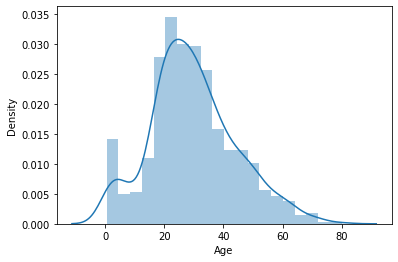

In [29]:
sns.distplot(train['Age'])

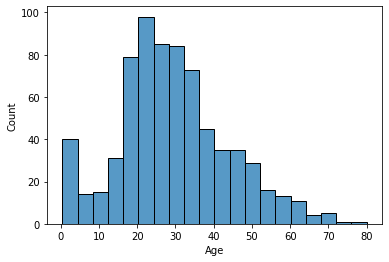

In [30]:
sns.histplot(train['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


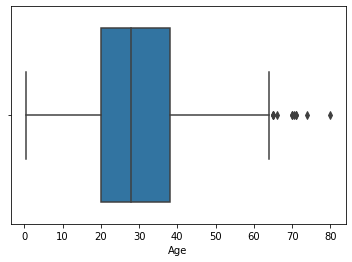

In [31]:
sns.boxplot(train['Age'])

In [32]:
train['Age'].value_counts(normalize=True)

24.00    0.042017
22.00    0.037815
18.00    0.036415
19.00    0.035014
28.00    0.035014
           ...   
36.50    0.001401
55.50    0.001401
0.92     0.001401
23.50    0.001401
74.00    0.001401
Name: Age, Length: 88, dtype: float64

SibSp 의 분포는 ? sns.distplot(), sns.histplot(). sns.boxplot() 이용

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


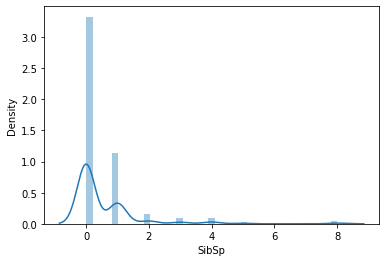

In [33]:
sns.distplot(train['SibSp'])

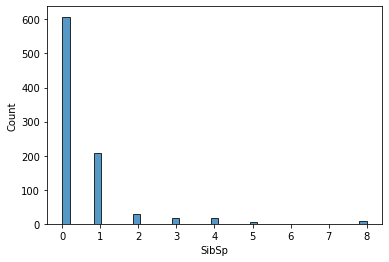

In [ ]:
sns.histplot(train['SibSp'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


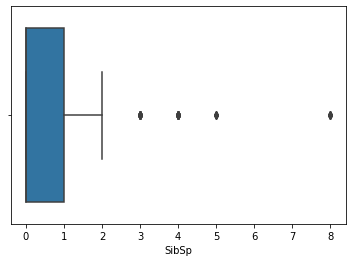

In [34]:
sns.boxplot(train['SibSp'])

In [ ]:
train['SibSp'].value_counts(normalize=True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

Parch 의 분포는 ? sns.distplot(), sns.histplot(). sns.boxplot() 이용

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


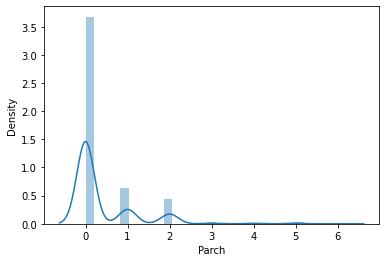

In [ ]:
sns.distplot(train['Parch'])

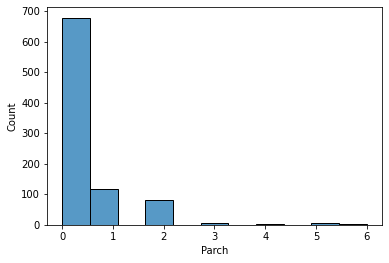

In [ ]:
sns.histplot(train['Parch'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


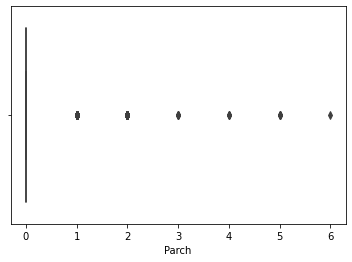

In [ ]:
sns.boxplot(train['Parch'])

In [ ]:
train['Parch'].value_counts(normalize=True)

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

Fare 의 분포는 ? sns.distplot(), sns.histplot(). sns.boxplot() 이용

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


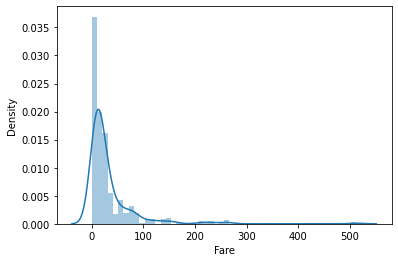

In [ ]:
sns.distplot(data['Fare'])

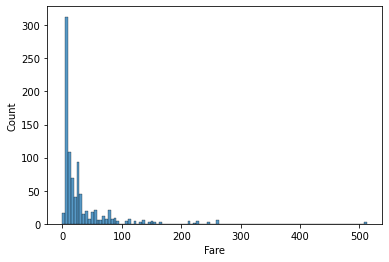

In [ ]:
sns.histplot(train['Fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


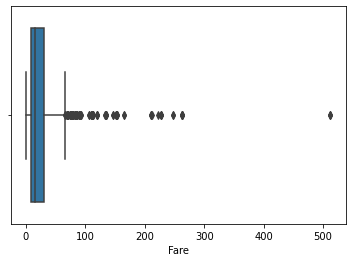

In [ ]:
sns.boxplot(train['Fare'])

In [ ]:
data['Fare'].value_counts(normalize=True)

8.0500     0.048260
13.0000    0.047138
7.8958     0.042649
7.7500     0.038159
26.0000    0.034792
             ...   
35.0000    0.001122
28.5000    0.001122
6.2375     0.001122
14.0000    0.001122
10.5167    0.001122
Name: Fare, Length: 248, dtype: float64

범주형 변수와 수치형 변수의 관계 비교

생존자 train['Survived'] == 1와 사망자 train['Survived'] == 0의 Age 분포를 작성하고 비교하세요. sns.distplot(), sns.boxplot() 이용

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


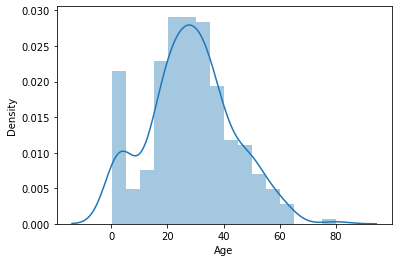

In [ ]:
sns.distplot(train[(train['Survived'] == 1)]['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


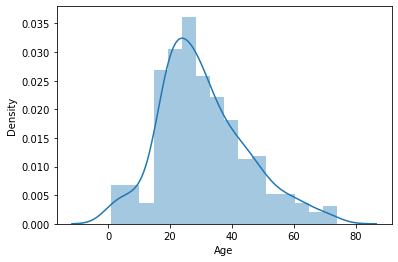

In [ ]:
sns.distplot(train[(train['Survived'] == 0)]['Age']) 

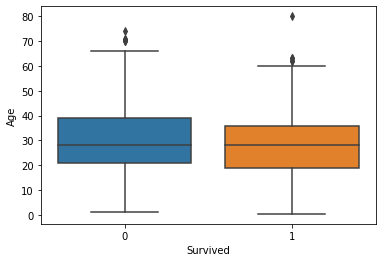

In [ ]:
sns.boxplot(x='Survived', y='Age', data=train)

A) 생존자 data['Survived'] == 1와 사망자 data['Survived'] == 0의 Age 분포는 ?

In [ ]:
train.groupby(train['Survived'])['Age'].mean().sort_index(ascending=True)

Survived
0    30.214936
1    28.066287
Name: Age, dtype: float64

In [ ]:
train.groupby(train['Survived'])['Age'].mean().sort_values(ascending=True)

Survived
1    28.066287
0    30.214936
Name: Age, dtype: float64

Q) 생존자 data['Survived'] == 1와 사망자 data['Survived'] == 0 요금 train['Fare']의 분포를 작성하고 비교하세요.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


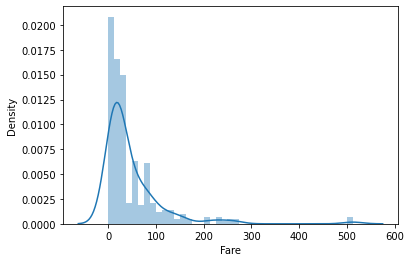

In [ ]:
sns.distplot(train[(train['Survived'] == 1)]['Fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


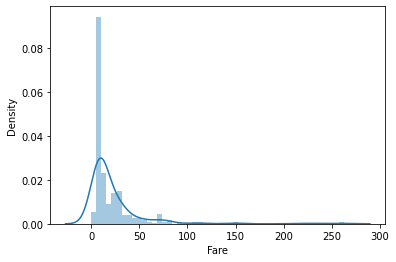

In [ ]:
sns.distplot(train[(train['Survived'] == 0)]['Fare'])

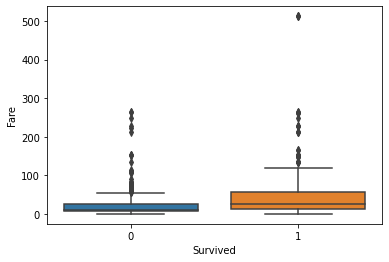

In [ ]:
sns.boxplot(x='Survived', y='Fare', data=train)

A) 생존자와 요금의 관계는 ? 

결측치 처리

결측치 처리 Age 177 건, Embarked 2 건

In [233]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [234]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [37]:
train[train['Age'].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [38]:
train[train['Age'].isnull()].groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Pclass,,,,,,,,,,
1,30,30,30,30,0,30,30,30,30,30
2,11,11,11,11,0,11,11,11,11,11
3,136,136,136,136,0,136,136,136,136,136


Age 컬럼 값이 결측치가 아닌 행들은 ?

In [39]:
train[train['Age'].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Age 컬럼 값이 결측치가 아닌 행들의 좌석등급별 도수는 ?

In [166]:
train[train['Age'].notnull()].groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Pclass,,,,,,,,,,
1,186,186,186,186,186,186,186,186,186,184
2,173,173,173,173,173,173,173,173,173,173
3,355,355,355,355,355,355,355,355,355,355


Age 컬럼 값이 결측치가 아닌 행들을 좌석등급별 평균값은 ?

In [167]:
train[train['Age'].notnull()].groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

Age 컬럼 값이 결측치가 아닌 행들을 좌석등급별 Age의 중앙값은 ?

In [ ]:
train[train['Age'].notnull()].groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

Q) 좌석등급별 Age 의 분포를 sns.boxplot()을 이용해서 나타내보세요.

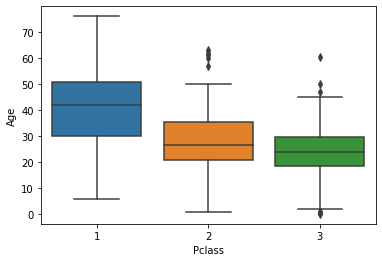

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=test)

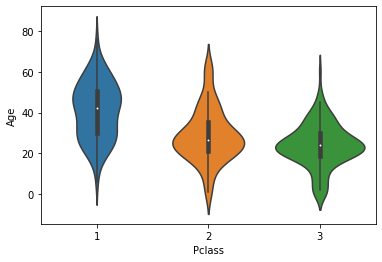

In [ ]:
sns.violinplot(x='Pclass', y='Age', data=test)

In [43]:
print(test[test['Pclass']==1]['Age'].mean())
print(test[test['Pclass']==2]['Age'].mean())
print(test[test['Pclass']==3]['Age'].mean())

40.91836734693877
28.7775
24.02794520547945


In [ ]:
test.groupby("Pclass")["Age"].mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [ ]:
test.groupby("Pclass")["Age"].median()

Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64

In [ ]:
'''
def fill_in_na_values(cols):
  age = cols[0]
  pclass = cols[1]
  
  if pd.isnull(age):
    if pclass == 1:
      return train[train['Pclass']==1]['Age'].mean()
    elif pclass == 2:
      return train[train['Pclass']==2]['Age'].mean()
    elif pclass == 3:
      return train[train['Pclass']==3]['Age'].mean()
  else:
    return age
'''

In [ ]:
#train['Age'] = train[['Age', 'Pclass']].apply(fill_in_na_values, axis=1)

In [398]:
train["Age"].fillna(train.groupby("Pclass")["Age"].transform("mean"), inplace=True)
test["Age"].fillna(test.groupby("Pclass")["Age"].transform("mean"), inplace=True)

In [399]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [403]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
'''
import re
print(re.search('\.', 'Saether, Mr. Simon Sivertsen'))
print(re.search('\\.', 'Saether, Mr. Simon Sivertsen'))
print(re.search('[A-Za-z]', 'Saether, Mr. Simon Sivertsen'))
print(re.search('([A-Za-z]+)', 'Saether, Mr. Simon Sivertsen'))
print(re.search('([A-Za-z]+)\.', 'Saether, Mr. Simon Sivertsen'))
'''

"\nimport re\nprint(re.search('\\.', 'Saether, Mr. Simon Sivertsen'))\nprint(re.search('\\.', 'Saether, Mr. Simon Sivertsen'))\nprint(re.search('[A-Za-z]', 'Saether, Mr. Simon Sivertsen'))\nprint(re.search('([A-Za-z]+)', 'Saether, Mr. Simon Sivertsen'))\nprint(re.search('([A-Za-z]+)\\.', 'Saether, Mr. Simon Sivertsen'))\n"

In [404]:
print(train['Title'].unique())
print(test['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [244]:
train.groupby("Title")["Age"].median()

Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          44.0
Jonkheer    38.0
Lady        48.0
Major       48.5
Master       4.0
Miss        24.0
Mlle        24.0
Mme         24.0
Mr          28.0
Mrs         35.0
Ms          28.0
Rev         46.5
Sir         49.0
Name: Age, dtype: float64

In [ ]:
#train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

In [190]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [62]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,Mrs


In [63]:
train[train['Embarked'].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


In [245]:
train[train['Embarked'].notnull()].groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Title
Embarked,,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77,77,77,77
S,644,644,644,644,644,644,644,644,644,644,644


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


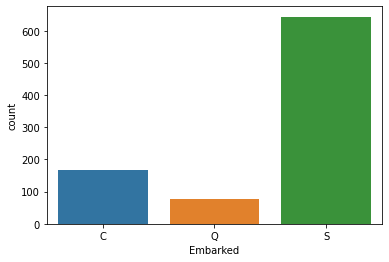

In [395]:
sns.countplot(train[train['Embarked'].notnull()]['Embarked'].sort_values(ascending=True))

In [396]:
train['Embarked'] = train['Embarked'].fillna('S')

In [ ]:
# train.dropna(inplace=True) #drop all the data with missing

In [397]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [71]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,Mr


In [73]:
test[test['Fare'].notnull()].groupby(test['Pclass']).mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,1098.224299,1.0,41.009346,0.476636,0.383178,94.280297
2,1117.935484,2.0,28.655054,0.376344,0.344086,22.202104
3,1094.410138,3.0,23.850599,0.465438,0.419355,12.459678


In [194]:
test[test['Fare'].notnull()].groupby(test['Pclass']).median()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,1094.0,1.0,42.0,0.0,0.0,60.0000
2,1122.0,2.0,26.5,0.0,0.0,15.7500
3,1092.0,3.0,24.0,0.0,0.0,7.8958


In [400]:
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("mean"), inplace=True)

In [401]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


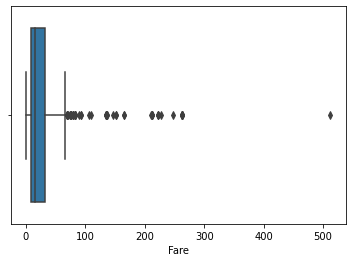

In [75]:
sns.boxplot(test['Fare'])

In [ ]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [405]:
# Convert Sex Columns
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
train['Embarked'] = le.fit_transform(train['Embarked'])
train['Title'] = le.fit_transform(train['Title'])

# embarked_mapping = {"S": 0, "C": 1, "Q": 2}
# train['Embarked'] = train['Embarked'].map(embarked_mapping)
# train['Sex'] = train['Sex'].map({'male':0, 'female':1})
# train['Sex'] = train['Sex'].map({'male':0, 'female':1})
# Title_mapping = {'Mr': 0, 'Mrs' : 1, 'Miss' : 2, 'Master' : 3, 'Don' : 4, 'Rev' : 5, 'Dr': 6, 'Mme' : 7, 'Ms' : 8,
#       'Major' : 9, 'Lady' : 10, 'Sir' : 11, 'Mlle' : 12, 'Col' : 13, 'Capt' : 14, 'Countess' : 15,
#       'Jonkheer': 16}
# train['Title'] = train['Title'].map(Title_mapping)

In [406]:
# Convert Sex Columns
le = LabelEncoder()
test['Sex'] = le.fit_transform(test['Sex'])
test['Embarked'] = le.fit_transform(test['Embarked'])
test['Title'] = le.fit_transform(test['Title'])

In [407]:
print(train['Sex'].unique())
print(test['Sex'].unique())

[1 0]
[1 0]


In [408]:
print(train['Title'].unique())
print(test['Title'].unique())

[12 13  9  8  3 15  4 11 14  7  6 16 10  1  0  2  5]
[5 6 4 3 7 0 8 2 1]


In [409]:
print(train['Embarked'].unique())
print(test['Embarked'].unique())

[2 0 1]
[1 2 0]


In [88]:
'''
Title_mapping = {'Mr': 0, 'Mrs' : 1, 'Miss' : 2, 'Master' : 3, 'Don' : 4, 'Rev' : 5, 'Dr': 6, 'Mme' : 7, 'Ms' : 8,
       'Major' : 9, 'Lady' : 10, 'Sir' : 11, 'Mlle' : 12, 'Col' : 13, 'Capt' : 14, 'Countess' : 15,
       'Jonkheer': 16}
train['Title'] = train['Title'].map(Title_mapping)       
'''

"\nTitle_mapping = {'Mr': 0, 'Mrs' : 1, 'Miss' : 2, 'Master' : 3, 'Don' : 4, 'Rev' : 5, 'Dr': 6, 'Mme' : 7, 'Ms' : 8,\n       'Major' : 9, 'Lady' : 10, 'Sir' : 11, 'Mlle' : 12, 'Col' : 13, 'Capt' : 14, 'Countess' : 15,\n       'Jonkheer': 16}\ntest['Title'] = test['Title'].map(Title_mapping)       \n"

In [410]:
  train.loc[ train['Age'] <= 16, 'Age'] = 0
  train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
  train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
  train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
  train.loc[ train['Age'] > 64, 'Age'] = 4

In [411]:
  test.loc[ test['Age'] <= 16, 'Age'] = 0
  test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
  test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
  test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
  test.loc[ test['Age'] > 64, 'Age'] = 4

In [412]:
  train.loc[ train['Fare'] <= 17, 'Fare'] = 0
  train.loc[(train['Fare'] > 17) & (train['Fare'] <= 30), 'Fare'] = 1
  train.loc[(train['Fare'] > 30) & (train['Fare'] <= 100), 'Fare'] = 2
  train.loc[ train['Fare'] > 100, 'Fare'] = 3

In [413]:
  test.loc[ test['Fare'] <= 17, 'Fare'] = 0
  test.loc[(test['Fare'] > 17) & (test['Fare'] <= 30), 'Fare'] = 1
  test.loc[(test['Fare'] > 30) & (test['Fare'] <= 100), 'Fare'] = 2
  test.loc[ test['Fare'] > 100, 'Fare'] = 3

In [ ]:
# data['Family'] = data['SibSp'] + data['Parch'] + 1 

In [414]:
print(train['Age'].unique())
print(test['Age'].unique())

[1. 2. 3. 0. 4.]
[2. 3. 1. 0. 4.]


In [415]:
print(train['Fare'].unique())
print(test['Fare'].unique())

[0. 2. 1. 3.]
[0. 1. 2. 3.]


4. Decide variable to use

In [416]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",1,2.0,0,0,330911,0.0,NaN,1,5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2.0,1,0,363272,0.0,NaN,2,6
2,894,2,"Myles, Mr. Thomas Francis",1,3.0,0,0,240276,0.0,NaN,1,5
3,895,3,"Wirz, Mr. Albert",1,1.0,0,0,315154,0.0,NaN,2,5
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1.0,1,1,3101298,0.0,NaN,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,1.0,0,0,A.5. 3236,0.0,NaN,2,5
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,2.0,0,0,PC 17758,3.0,C105,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",1,2.0,0,0,SOTON/O.Q. 3101262,0.0,NaN,2,5
416,1308,3,"Ware, Mr. Frederick",1,1.0,0,0,359309,0.0,NaN,2,5


5. testing/Testing split

In [420]:
X_train = train[['Pclass', 'Sex', 'Fare', 'Title', 'Age', 'SibSp', 'Parch', 'Embarked']]
y_train = train['Survived']

In [421]:
X_test = test[['Pclass', 'Sex', 'Fare', 'Title', 'Age', 'SibSp', 'Parch','Embarked']]
#y_test = test['Survived']

6. Training model on training set

In [422]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
lr = LogisticRegression()
dt = DecisionTreeClassifier()

In [423]:
lr.fit(X_train, y_train)

LogisticRegression()

In [424]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [425]:
lr_pred = lr.predict(X_test)

In [426]:
dt_pred = dt.predict(X_test)

In [354]:
y_test = dt_pred

In [340]:
y_test.shape

(418,)

In [386]:
#submission['Survived'] = lr_pred 
#ubmission.to_csv('/content/drive/MyDrive/logistic_regression_pred.csv', index = False)
submission['Survived'] = dt_pred
submission.to_csv('/content/drive/MyDrive/decision_tree_pred.csv', index = False)

In [431]:
dt = DecisionTreeClassifier(max_depth=4)
dt_model = dt.fit(X_train, y_train)

In [432]:
lr = LogisticRegression()
lr_model = lr.fit(X_train, y_train)

7. Tree visualization

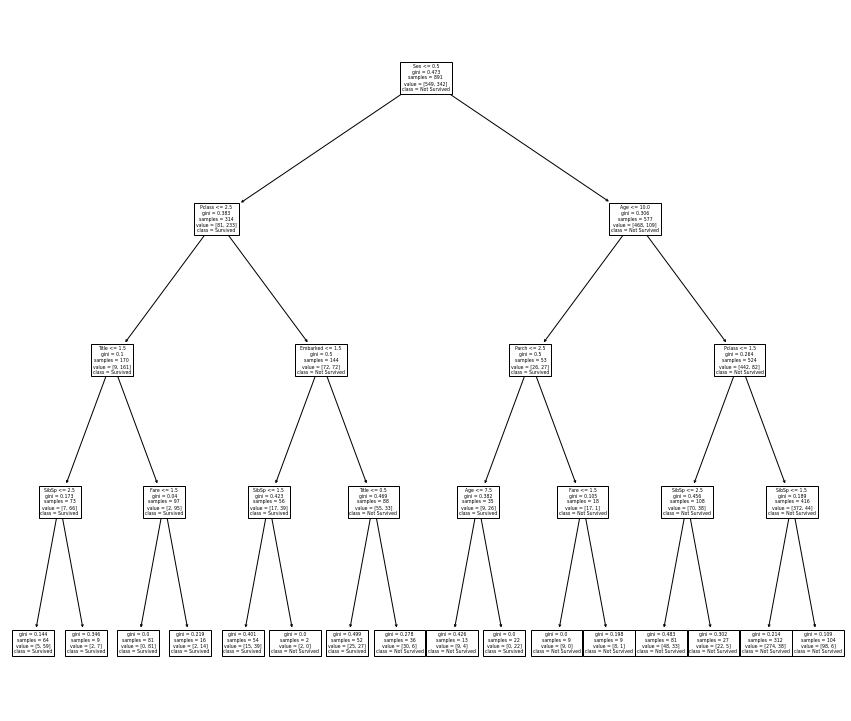

In [433]:
fig = plt.figure(figsize=(15,13)) # 72 pixel per 1
tree.plot_tree(dt_model, feature_names = ['Pclass', 'Sex', 'Title', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], class_names = ['Not Survived', 'Survived'] )
plt.show()

8. Evaluate model performance on testing set

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


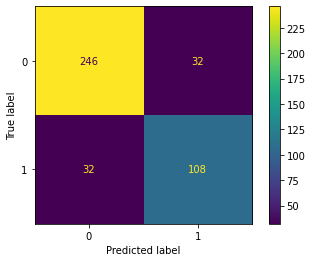

In [434]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
#from sklearn.model_selection import train_test_split
#from sklearn.svm import SVC
#X, y = make_classification(random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#clf = SVC(random_state=0)
#clf = DecisionTreeClassifier(random_state=0)
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
#clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
#SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [435]:
# accuracy
dt_model.score(X_test, y_test)

0.84688995215311

In [385]:
lr_model.score(X_test, lr_pred)

1.0

0.8491620111731844
0.8156424581005587
0.8146067415730337 

% of the testing set is correctly classified.

In [ ]:
data.corr()

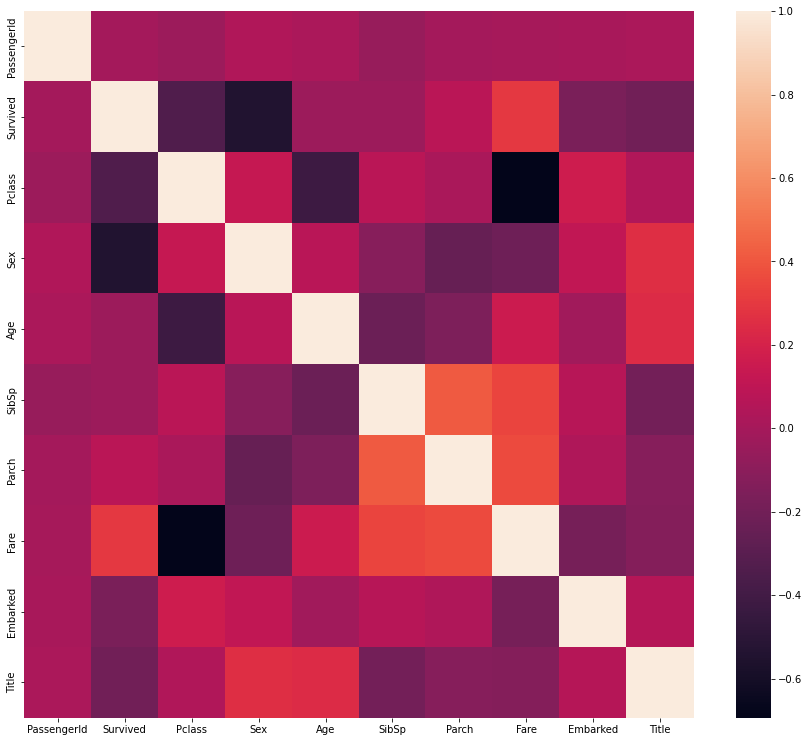

In [143]:
plt.figure(figsize=(15,13))
sns.heatmap(train.corr())

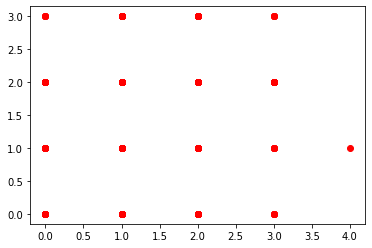

In [144]:
plt.plot(train[(train.Survived==1)].Age, train[(train.Survived==1)].Fare, 'ro') 

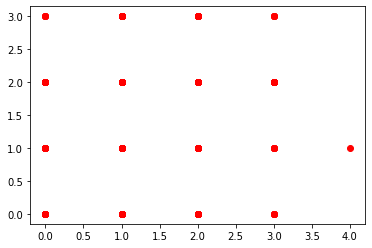

In [149]:
plt.plot(train[train['Survived']==1]['Age'], train[train['Survived']==1]['Fare'], 'ro') 

In [151]:
train['Age']

0      1.0
1      2.0
2      1.0
3      2.0
4      2.0
      ... 
886    1.0
887    1.0
888    1.0
889    1.0
890    1.0
Name: Age, Length: 891, dtype: float64

In [152]:
train['Fare']

0      0.0
1      2.0
2      0.0
3      2.0
4      0.0
      ... 
886    0.0
887    1.0
888    1.0
889    1.0
890    0.0
Name: Fare, Length: 891, dtype: float64